# Data Extraction
Extract and analyze data from Chinook database

## 1. Setup

In [1]:
# Install required packages
%pip install pandas sqlalchemy psycopg2-binary matplotlib seaborn

# Import libraries
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Database connection setup
PG_HOST = 'localhost'
PG_PORT = 5432
PG_USER = 'postgres'
PG_PASSWORD = 'pass1234'
PG_DB = 'chinook'

# Create SQLAlchemy engine
engine = create_engine(f'postgresql+psycopg2://{PG_USER}:{PG_PASSWORD}@{PG_HOST}:{PG_PORT}/{PG_DB}')

# Test connection
try:
    with engine.connect() as conn:
        print("Successfully connected to the database!")
except Exception as e:
    print(f"Error connecting to database: {str(e)}")

Note: you may need to restart the kernel to use updated packages.
Successfully connected to the database!


## 2. Extract Track Data

In [2]:
# Load tracks with additional information
query = """
SELECT t.*, 
       a.title as album_title,
       art.name as artist_name,
       g.name as genre_name
FROM track t
JOIN album a ON t.album_id = a.album_id
JOIN artist art ON a.artist_id = art.artist_id
JOIN genre g ON t.genre_id = g.genre_id
"""

tracks = pd.read_sql(query, engine)
print(f"Loaded {len(tracks)} tracks")
tracks.head()

Loaded 3503 tracks


,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price,album_title,artist_name,genre_name
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,For Those About To Rock We Salute You,AC/DC,Rock
1,2,Balls to the Wall,2,2,1,"U. Dirkschneider, W. Hoffmann, H. Frank, P. Ba...",342562,5510424,0.99,Balls to the Wall,Accept,Rock
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99,Restless and Wild,Accept,Rock
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,Restless and Wild,Accept,Rock
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99,Restless and Wild,Accept,Rock


## 3. Data Cleaning

In [3]:
# Remove duplicates
tracks = tracks.drop_duplicates()

# Check for missing values
missing_summary = tracks.isnull().sum().sort_values(ascending=False)
print("Missing values:")
print(missing_summary[missing_summary > 0])

# Fill missing composers
tracks['composer'] = tracks['composer'].fillna('Unknown')

# Convert numeric columns
numeric_cols = ['milliseconds', 'bytes', 'unit_price']
for col in numeric_cols:
    tracks[col] = pd.to_numeric(tracks[col], errors='coerce')

Missing values:
composer    977
dtype: int64


## 4. Data Analysis

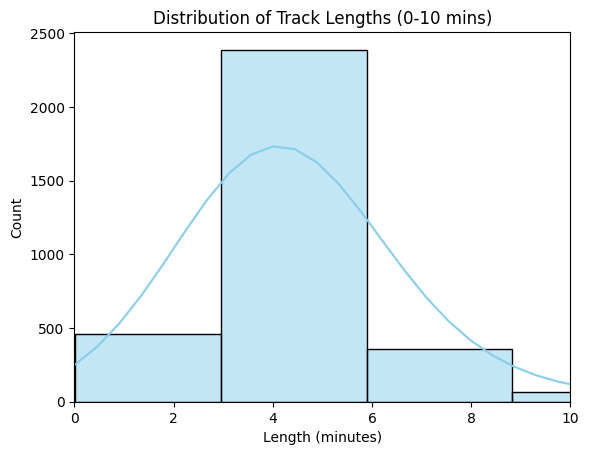

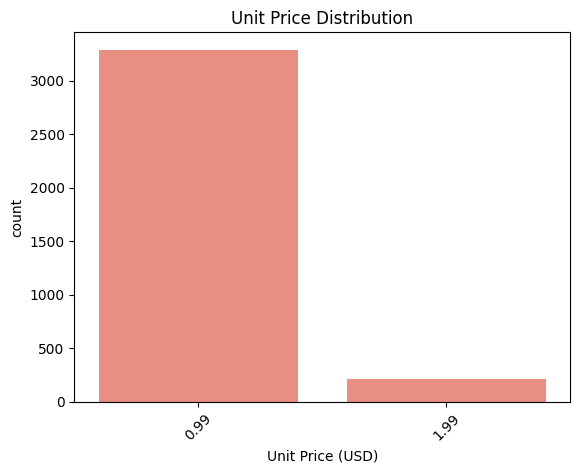

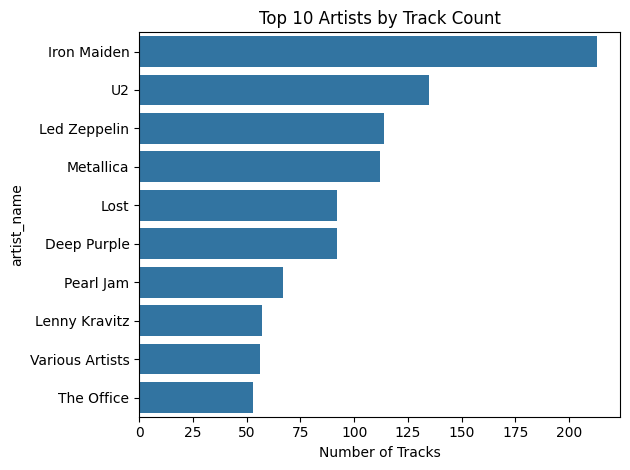

In [4]:
# Track length distribution
track_minutes = tracks['milliseconds'] / 60000
sns.histplot(track_minutes, bins=30, kde=True, color='skyblue')
plt.xlim(0, 10)
plt.xlabel('Length (minutes)')
plt.title('Distribution of Track Lengths (0-10 mins)')
plt.show()

# Price distribution
sns.countplot(x='unit_price', data=tracks, color='salmon')
plt.xlabel('Unit Price (USD)')
plt.title('Unit Price Distribution')
plt.xticks(rotation=45)
plt.show()

# Top artists by track count
top_artists = tracks['artist_name'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.xlabel('Number of Tracks')
plt.title('Top 10 Artists by Track Count')
plt.tight_layout()
plt.show()

## 5. Save Processed Data

In [5]:
# Save cleaned data to CSV
tracks.to_csv('processed_tracks.csv', index=False)
print("Processed data saved to 'processed_tracks.csv'")

Processed data saved to 'processed_tracks.csv'
